In [1]:
import pandas as pd
from sklearn import ensemble
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [4]:
train.ix[0,:11]

Id                                       1
Elevation                             2596
Aspect                                  51
Slope                                    3
Horizontal_Distance_To_Hydrology       258
Vertical_Distance_To_Hydrology           0
Horizontal_Distance_To_Roadways        510
Hillshade_9am                          221
Hillshade_Noon                         232
Hillshade_3pm                          148
Horizontal_Distance_To_Fire_Points    6279
Name: 0, dtype: int64

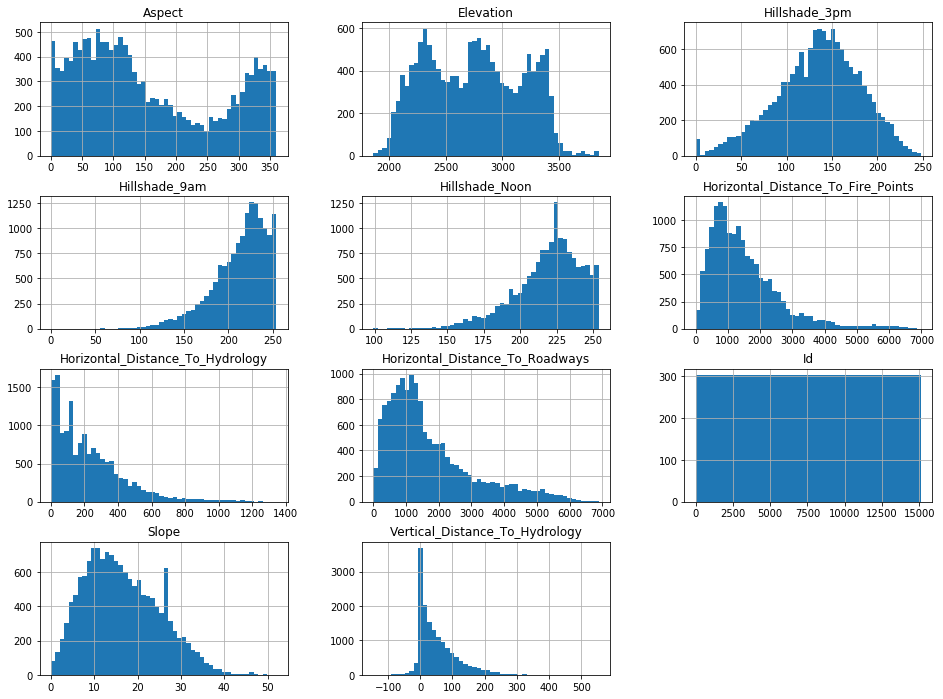

In [6]:
train.ix[:,:11].hist(figsize=(16,12),bins=50)
plt.show()

In [7]:
def r(x):
    if x+180>360:
        return x-180
    else:
        return x+180

train['Aspect2'] = train.Aspect.map(r)
test['Aspect2'] = test.Aspect.map(r)

In [9]:
train['Highwater'] = train.Vertical_Distance_To_Hydrology < 0
test['Highwater'] = test.Vertical_Distance_To_Hydrology < 0

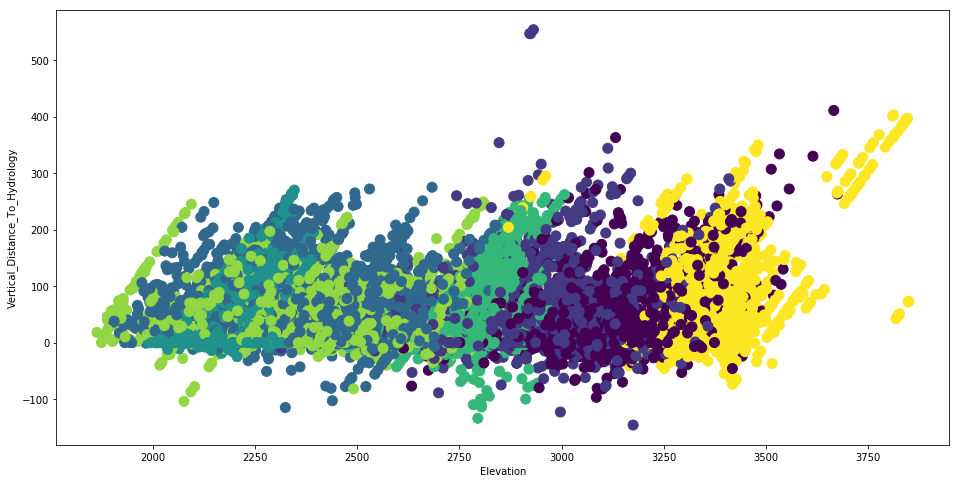

In [12]:
import numpy as np
from IPython.display import Image


def plotc(c1, c2):
    fig = plt.figure(figsize=(16, 8))
    sel = np.array(list(train.Cover_Type.values))
    plt.scatter(c1, c2, c=sel, s=100)
    plt.xlabel(c1.name)
    plt.ylabel(c2.name)


plotc(train.Elevation, train.Vertical_Distance_To_Hydrology)


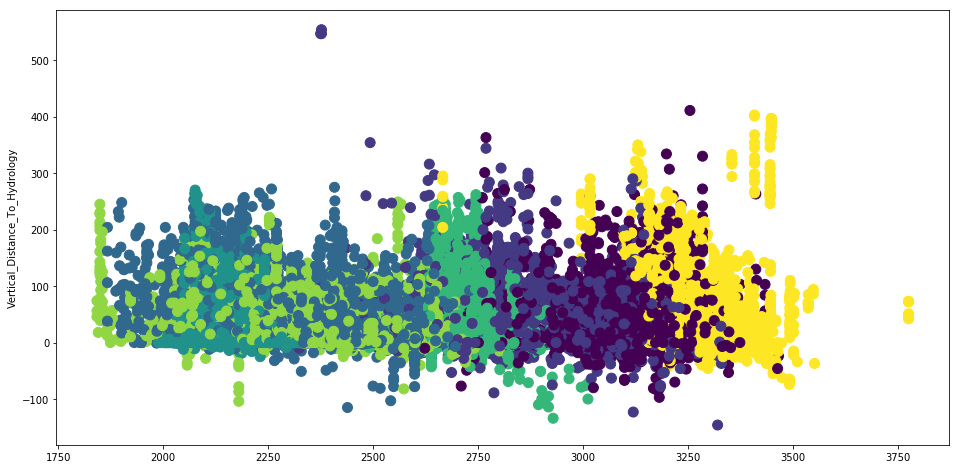

In [13]:
plotc(train.Elevation-train.Vertical_Distance_To_Hydrology, train.Vertical_Distance_To_Hydrology)

In [14]:
train['EVDtH'] = train.Elevation-train.Vertical_Distance_To_Hydrology
test['EVDtH'] = test.Elevation-test.Vertical_Distance_To_Hydrology

train['EHDtH'] = train.Elevation-train.Horizontal_Distance_To_Hydrology*0.2
test['EHDtH'] = test.Elevation-test.Horizontal_Distance_To_Hydrology*0.2

In [15]:
train['Distanse_to_Hydrolody'] = (train['Horizontal_Distance_To_Hydrology']**2+train['Vertical_Distance_To_Hydrology']**2)**0.5
test['Distanse_to_Hydrolody'] = (test['Horizontal_Distance_To_Hydrology']**2+test['Vertical_Distance_To_Hydrology']**2)**0.5

train['Hydro_Fire_1'] = train['Horizontal_Distance_To_Hydrology']+train['Horizontal_Distance_To_Fire_Points']
test['Hydro_Fire_1'] = test['Horizontal_Distance_To_Hydrology']+test['Horizontal_Distance_To_Fire_Points']

train['Hydro_Fire_2'] = abs(train['Horizontal_Distance_To_Hydrology']-train['Horizontal_Distance_To_Fire_Points'])
test['Hydro_Fire_2'] = abs(test['Horizontal_Distance_To_Hydrology']-test['Horizontal_Distance_To_Fire_Points'])

train['Hydro_Road_1'] = abs(train['Horizontal_Distance_To_Hydrology']+train['Horizontal_Distance_To_Roadways'])
test['Hydro_Road_1'] = abs(test['Horizontal_Distance_To_Hydrology']+test['Horizontal_Distance_To_Roadways'])

train['Hydro_Road_2'] = abs(train['Horizontal_Distance_To_Hydrology']-train['Horizontal_Distance_To_Roadways'])
test['Hydro_Road_2'] = abs(test['Horizontal_Distance_To_Hydrology']-test['Horizontal_Distance_To_Roadways'])

train['Fire_Road_1'] = abs(train['Horizontal_Distance_To_Fire_Points']+train['Horizontal_Distance_To_Roadways'])
test['Fire_Road_1'] = abs(test['Horizontal_Distance_To_Fire_Points']+test['Horizontal_Distance_To_Roadways'])

train['Fire_Road_2'] = abs(train['Horizontal_Distance_To_Fire_Points']-train['Horizontal_Distance_To_Roadways'])
test['Fire_Road_2'] = abs(test['Horizontal_Distance_To_Fire_Points']-test['Horizontal_Distance_To_Roadways'])

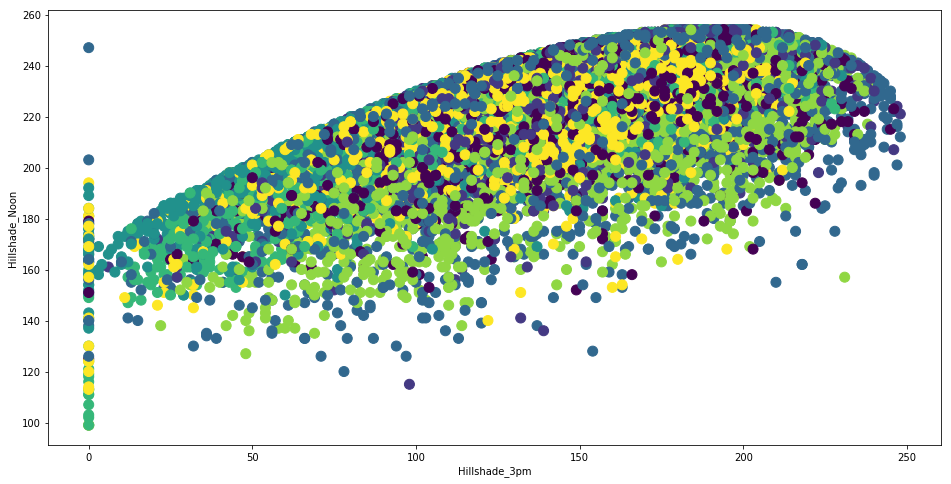

In [16]:
plotc(train.Hillshade_3pm, train.Hillshade_Noon)

In [18]:
train.to_csv('data/train_advance.csv')
test.to_csv('data/test_advance.csv')